<a href="https://colab.research.google.com/github/lirandepira/interpret-qnn/blob/main/Local_Interpreters_for_QNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explicability and Inexplicability in the Interpretation of Quantum Neural Networks**

*Lirandë Pira & Chris Ferrie*

This code designs and implements a local model-agnostic interpreter for a quantum neural network. Consequently, in this simulation we define the so-called *region of indecision* which is evident when interpreting different data samples with a quantum classifier. This implies that there is a region in the classifier, in which corresponding data points will not have an interpretation, due to the random nature of quantum effects.

This tutorial style simulation has four main parts. After data loading, readers familiar with the concept of model-agnostic local interpretability, can skim through. The results in Classical Training section do not affect the simulations in Quantum Training section, and consequently the Region of Indecision.

# Data Loading

In [1]:
# Install Qiskit, an open-source quantum computing framework
!pip install qiskit --quiet

In [2]:
# Necessary imports

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors


import numpy as np
import scipy as sp
import sklearn as sk
import qiskit as qk

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load the Iris dataset
iris = load_iris()

# Normalize the data by subtracting the minimum value and dividing by the maximum value
iris.data = (iris.data-iris.data.min())/iris.data.max()

In [4]:
# Use the first two classes of the Iris dataset only (100 of 150 data points)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris.data[0:100,[0,1]],
    iris.target[0:100],
    test_size=0.75,
    random_state=0)

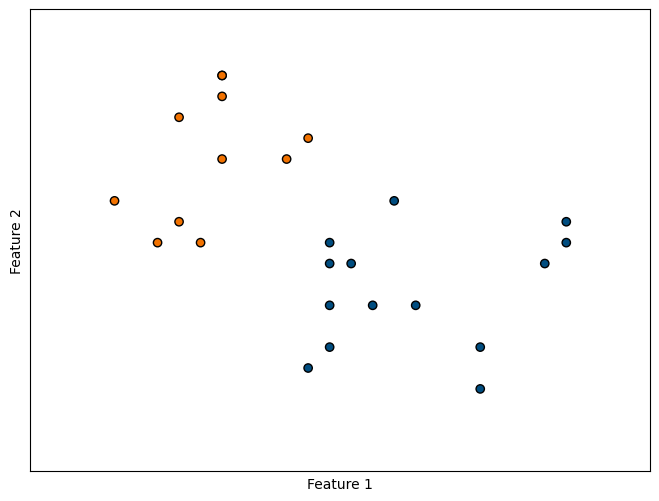

In [5]:
x = X_train
y = Y_train

 # Calculate the minimum and maximum values for x-axis and y-axis
x_min, x_max = x[:, 0].min() - 0.05, x[:, 0].max() + 0.05
y_min, y_max = x[:, 1].min() - 0.05, x[:, 1].max() + 0.05

plt.figure(2, figsize=(8, 6))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

# Plot the training points. Scatter plot of x and y with color-coded classes
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=custom_cmap, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)

plt.xticks(())
plt.yticks(());

# Classical Training
Note: This section is here for tutorial purposes, it may be skipped should one have prior knowledge of training interpretable local surrogate models.

In [6]:
# Create an instance of the K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

print('The accuracy of the knn classifier is {:.2f} on training data'.format(knn.score(X_train, Y_train)))
print('The accuracy of the knn classifier is {:.2f} on test data'.format(knn.score(X_test, Y_test)))

The accuracy of the knn classifier is 1.00 on training data
The accuracy of the knn classifier is 0.99 on test data


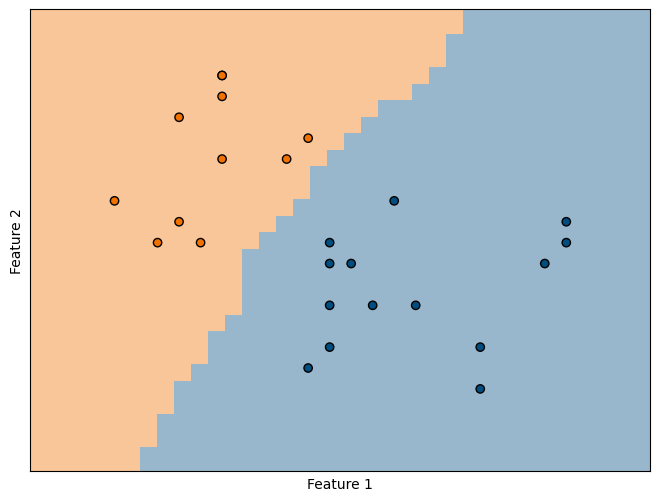

In [7]:
plt.figure(2, figsize=(8, 6))

x = X_train
y = Y_train

x_min, x_max = x[:, 0].min() - 0.05, x[:, 0].max() + 0.05
y_min, y_max = x[:, 1].min() - 0.05, x[:, 1].max() + 0.05

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

# Predict and reshape the labels for the meshgrid points
Z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

 # Plot the training points with color-coded classes
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=custom_cmap, edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)

plt.xticks(())
plt.yticks(());

In [8]:
# Define variable local_idx with value 1
local_idx = 1

# Create new_X_train and add random noise to the selected row of X_train
new_X_train = X_train[local_idx,:]+0.025*np.random.randn(100,2)

new_Y_train = knn.predict(new_X_train)

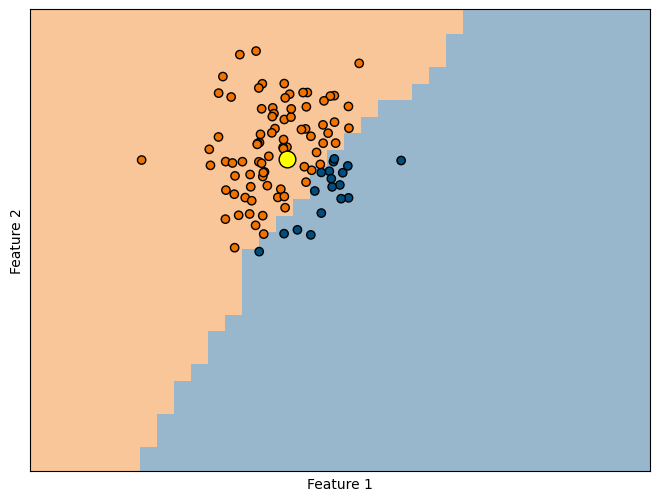

In [9]:
plt.figure(2, figsize=(8, 6))

x = X_train

x_min, x_max = x[:, 0].min() - 0.05, x[:, 0].max() + 0.05
y_min, y_max = x[:, 1].min() - 0.05, x[:, 1].max() + 0.05

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

Z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

# Plot a data sample as a marker to indicate the selected point from X_train
plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
markerfacecolor="yellow")

plt.scatter(new_X_train[:, 0], new_X_train[:, 1], c=new_Y_train, cmap=custom_cmap, edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)

plt.xticks(())
plt.yticks(());

In [10]:
# Define logistic regression
lin = LogisticRegression(fit_intercept = True, C=1e5)
lin.fit(new_X_train, new_Y_train)

LogisticRegression(C=100000.0)

([], [])

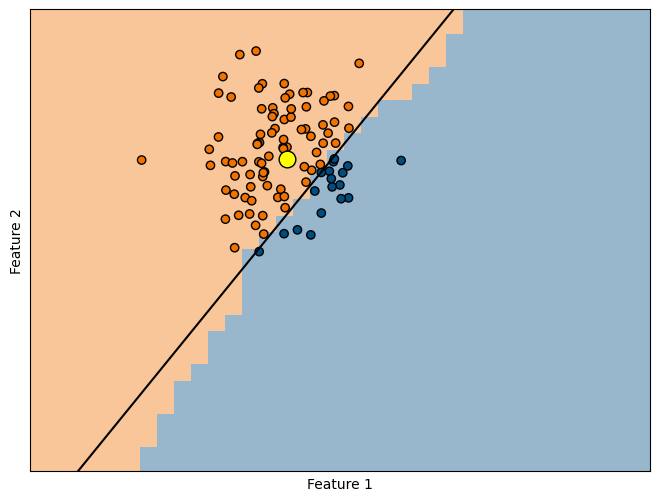

In [11]:
plt.figure(2, figsize=(8, 6))

x = X_train

x_min, x_max = x[:, 0].min() - 0.05, x[:, 0].max() + 0.05
y_min, y_max = x[:, 1].min() - 0.05, x[:, 1].max() + 0.05

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

Z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
markerfacecolor="yellow")

w = lin.coef_[0] # Extract the coefficients of the logistic regression
m = - w[0] / w[1] # Calculate the slope of the decision boundary
b = (0.5 - lin.intercept_[0]) / w[1] # Calculate the y-intercept of the decision boundary

 # Plot the decision boundary line
plt.plot(np.linspace(x_min,x_max,100), m*np.linspace(x_min,x_max,100)+b,'k')

plt.scatter(new_X_train[:, 0], new_X_train[:, 1], c=new_Y_train, cmap=custom_cmap, edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)

plt.xticks(())
plt.yticks(())

# Quantum Training

In [12]:
# Apply angle encoding to clasical dataset
def encode(X, layers=2):
    n_qubits = X.shape[0]
    q = qk.QuantumRegister(n_qubits)
    c = qk.ClassicalRegister(1)
    qc = qk.QuantumCircuit(q, c)

    for l in range(layers):
        for qubit, x in enumerate(X):
            qc.h(qubit)
            qc.rz(2 * x, qubit)

        for qubit in range(n_qubits - 1):
            qc.cnot(qubit, qubit + 1)
            qc.rz((1 - X[qubit]) * (1 - X[qubit + 1]), qubit + 1)
            qc.cnot(qubit, qubit + 1)

    return qc, c

# Define the variational circuit
def variational_circuit(qc, theta):
    n_qubits = qc.num_qubits

    for qubit in range(n_qubits):
        qc.ry(theta[qubit], qubit)

    for qubit in range(n_qubits - 1):
        qc.cnot(qubit, qubit + 1)

    for qubit in range(n_qubits):
        qc.ry(theta[qubit + n_qubits], qubit)

    return qc

# Define the quantum neural network
def qnn(X, theta, shots=int(1e3)):
    qc, c = encode(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0, c)

    backend = qk.Aer.get_backend("qasm_simulator")
    job = qk.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return counts["1"] / shots


In [13]:
def objective(theta, X, Y, shots=int(1e4)):
    """
    Calculates the objective value for a given set of parameters, input data, and target values.

    Parameters:
        theta (numpy.ndarray): Array of parameters.
        X (numpy.ndarray): Input data.
        Y (numpy.ndarray): Target values.
        shots (int): Number of shots for quantum measurement (default: int(1e4)).

    Returns:
        float: The objective value.

    """
    n_data = X.shape[0]
    to_return = 0

    for idx in range(n_data):
        prediction = qnn(X[idx], theta, shots=shots)
        difference = np.abs(prediction - Y[idx])**2
        to_return += difference

    return to_return / n_data

In [14]:
def spsa(func, x0, a=0.1, c=0.1, alpha=0.602, gamma=0.101, maxiter=100, verbose=False):
    """
    Performs the Simultaneous Perturbation Stochastic Approximation (SPSA) optimization algorithm.

    Parameters:
        func (callable): Objective function to be minimized.
        x0 (numpy.ndarray): Initial guess for the parameters.
        a (float): Perturbation size parameter (default: 0.1).
        c (float): Step size parameter (default: 0.1).
        alpha (float): Exponent for step size decay (default: 0.602).
        gamma (float): Exponent for perturbation size decay (default: 0.101).
        maxiter (int): Maximum number of iterations (default: 100).
        verbose (bool): Whether to print progress messages (default: False).

    Returns:
        numpy.ndarray: Optimized parameters.

    """
    k = 0
    x = x0

    while k < maxiter:
        ak = a / (k + 1) ** alpha  # Step size
        ck = c / (k + 1) ** gamma  # Perturbation size
        delta = 2 * np.random.randint(0, 2, len(x0)) - 1  # Random perturbation (+1 or -1) for each parameter
        xp = x + ck * delta  # Perturbed parameter values (positive direction)
        xm = x - ck * delta  # Perturbed parameter values (negative direction)
        grad = (func(xp) - func(xm)) / (2 * ck) * delta  # Estimated gradient

        x = x - ak * grad

        if verbose and k % int(0.1 * maxiter) == 0:
            fx = func(x)
            print(f"Iteration {k}: f = {fx}")

        k += 1

    return x

In [ ]:
a = 2.5
c = 0.25
maxiter = 1e3
shots = int(1e4)

alpha = 0.602
gamma = 0.101

f = lambda x: objective(x,X_train,Y_train,shots=shots) # Objective function
x0 = np.pi*np.random.randn(4)

xsol = spsa(f, x0, a=a, c=c,
            alpha=alpha, gamma=gamma,
            maxiter=maxiter, verbose=True)

Iteration 0: f = 0.3650649876
Iteration 100: f = 0.17239077079999998
Iteration 200: f = 0.17456289479999998
Iteration 300: f = 0.1738200676
Iteration 400: f = 0.1735994364
Iteration 500: f = 0.1729475916


In [ ]:
plt.figure(2, figsize=(8, 6))

x = X_train
y = Y_train

x_min, x_max = x[:, 0].min() - 0.01, x[:, 0].max() + 0.01
y_min, y_max = x[:, 1].min() - 0.01, x[:, 1].max() + 0.01

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

Z = []
for idx1, idx2 in zip(x1.ravel(),x2.ravel()):
  Z.append(round(qnn(np.array([idx1,idx2]),xsol)))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

Z = np.array(Z).reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=custom_cmap, edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.006)

plt.xticks(())
plt.yticks(())

# Add the legend
classes = ['Class A', 'Class B']
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, loc='upper right')

In [ ]:
local_idx = 1

# Generate a new set of training data by adding random perturbations to the local data point
new_X_train = X_train[local_idx,:]+0.025*np.random.randn(100,2)
new_Y_train = np.array([round(qnn(new_X_train[y],xsol)) for y in range(100)])

In [ ]:
plt.figure(2, figsize=(8, 6))

x = X_train

x_min, x_max = x[:, 0].min() - 0.01, x[:, 0].max() + 0.01
y_min, y_max = x[:, 1].min() - 0.01, x[:, 1].max() + 0.01

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

Z = []
for idx1, idx2 in zip(x1.ravel(),x2.ravel()):
  Z.append(round(qnn(np.array([idx1,idx2]),xsol)))

# Manually define the colors for the colormap
custom_colors = ['#F27200', '#004D80']  # Specify the colors you want

# Create a custom colormap
custom_cmap = colors.ListedColormap(custom_colors)

Z = np.array(Z).reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
markerfacecolor="yellow")

scatter = plt.scatter(new_X_train[:, 0], new_X_train[:, 1], c=new_Y_train, cmap=custom_cmap, edgecolor="k")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)

plt.xticks(())
plt.yticks(())

# Add the legend
classes = ['Class A', 'Class B']
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, loc='upper right')

In [ ]:
lin = LogisticRegression(fit_intercept = True, C=1e5)
lin.fit(new_X_train, new_Y_train)

In [ ]:
plt.figure(2, figsize=(8, 6))

x = X_train

x_min, x_max = x[:, 0].min() - 0.01, x[:, 0].max() + 0.01
y_min, y_max = x[:, 1].min() - 0.01, x[:, 1].max() + 0.01

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

Z = []
for idx1, idx2 in zip(x1.ravel(),x2.ravel()):
  Z.append(round(qnn(np.array([idx1,idx2]),xsol)))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

Z = np.array(Z).reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
markerfacecolor="yellow")

scatter = plt.scatter(new_X_train[:, 0], new_X_train[:, 1], c=new_Y_train, cmap=custom_cmap, edgecolor="k")

w = lin.coef_[0]
m = -w[0] / w[1]
b = (0.5 - lin.intercept_[0]) / w[1]

plt.plot(np.array([x_min,x_max]), m*np.array([x_min,x_max])+b,'k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)
plt.xticks(())
plt.yticks(())

# Add the legend
classes = ['Class A', 'Class B']
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, loc='upper right')

In [ ]:
local_idx = 2

new_X_train = X_train[local_idx,:]+0.05*np.random.randn(100,2)
new_Y_train = np.array([round(qnn(new_X_train[y],xsol)) for y in range(100)])

lin = LogisticRegression(fit_intercept = True, C=1e5)
lin.fit(new_X_train, new_Y_train)

plt.figure(2, figsize=(8, 6))

x = X_train

x_min, x_max = x[:, 0].min() - 0.01, x[:, 0].max() + 0.01
y_min, y_max = x[:, 1].min() - 0.01, x[:, 1].max() + 0.01

x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

# Create a custom colormap
custom_colors = ['#F27200', '#004D80']
custom_cmap = colors.ListedColormap(custom_colors)

Z = []
for idx1, idx2 in zip(x1.ravel(),x2.ravel()):
  Z.append(round(qnn(np.array([idx1,idx2]),xsol)))

Z = np.array(Z).reshape(x1.shape)
plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
markerfacecolor="yellow")

scatter = plt.scatter(new_X_train[:, 0], new_X_train[:, 1], c=new_Y_train, cmap=custom_cmap, edgecolor="k")

w = lin.coef_[0]
m = -w[0] / w[1]
b = (0.5 - lin.intercept_[0]) / w[1]

plt.plot(np.array([x_min,x_max]), m*np.array([x_min,x_max])+b,'k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.xlim(x_min, x_max - 0.001)
plt.ylim(y_min, y_max - 0.01)
plt.xticks(())
plt.yticks(());

# Add the legend
classes = ['Class A', 'Class B']
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, loc='upper right')

# Region of Indecision

In [ ]:
def explain(local_idx, X_train, model, eps = 0.45, local_samples = 100, local_region = 0.025, n_samples = 25):
  lines = np.zeros([n_samples, 100])

  x = X_train

  x_min, x_max = x[:, 0].min() - 0.0101, x[:, 0].max() + 0.0101
  y_min, y_max = x[:, 1].min() - 0.0101, x[:, 1].max() + 0.0101

  x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

  # Generate lines for plotting by sampling new data points around local points
  for idn in range(n_samples):
    new_X_train = X_train[local_idx,:]+local_region*np.random.randn(local_samples,2)
    new_Y_train = np.array([round(model(new_X_train[y])) for y in range(local_samples)])

    lin = LogisticRegression(fit_intercept = True, C=1e5)
    lin.fit(new_X_train, new_Y_train)

    w = lin.coef_[0]
    m = -w[0] / w[1]
    b = (0.5 - lin.intercept_[0]) / w[1]

    lines[idn] = m*np.linspace(x_min,x_max,100)+b

  Z = []
  for idx1, idx2 in zip(x1.ravel(),x2.ravel()):
    Z.append(round(qnn(np.array([idx1,idx2]),xsol)))

  # Create a custom colormap
  custom_colors = ['#F27200', '#004D80']
  custom_cmap = colors.ListedColormap(custom_colors)

  Z = np.array(Z).reshape(x1.shape)
  plt.pcolormesh(x1, x2, Z, alpha=0.4, cmap=custom_cmap)

  plt.plot(x[local_idx,0], x[local_idx,1], marker="o", markersize=12, markeredgecolor="k",
  markerfacecolor="yellow")

  sorted_data = np.sort(lines,0)
  up = sorted_data[int((0.5+eps)*100)*n_samples//100,:]
  down = sorted_data[int((0.5-eps)*100)*n_samples//100,:]
  plt.fill_between(np.linspace(x_min,x_max,100), down, up, color = 'b', alpha=0.25)

  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")

  plt.xlim(x_min, x_max - 0.001)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(());

  # Add the legend
  elements = ['Marker', 'Region of indecision']
  plt.legend(elements, loc='lower right')

In [ ]:
# Explain the local behavior of the model
explain(1,X_train,lambda x : qnn(x,xsol))

In [ ]:
# Explain the local behavior of the model at a local region of value
explain(2,X_train, lambda x : qnn(x,xsol), local_region = 0.05)